<a href="https://colab.research.google.com/github/bits-aci/bits-ml-assignment1/blob/dev/Group238_Heartattack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Group No:</b> 238 <br>
<b>Assignment 1 - PS-6</b><br>
<b>Assignment dataset:</b> https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility

<b>Group members list:</b><br>

*   Sivabalan S (2022AC05637)
*   Rupp Santos (2022ac05570)
*   Srivatsan (2022AC05629)








**Section-1 :
Import of libraries and download of data set.**


In [ ]:
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files


uploaded = files.upload()

Saving heart.csv to heart.csv


**Section-2 : Data Visualization**

**Reading the data from CSV file**

In [ ]:
data_set = pd.read_csv("heart.csv")


**Sanity Check**

Visualizing the first 5 rows to check the coloumns

In [ ]:
data_set.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The below code is for checking whether the data is complete or any NULL values are there in the data set.

In [ ]:
# Command for checking if there is any NULL values in the data set
print(data_set.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**The data set is complete and it doesnt have any NULL values**

In [ ]:
# This command for displaying all the statistiscal data
data_set.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Description and Correctness of data in each column:
1) age: Range is between 29 and 77.
<br>2) sex : data is binary 1- male and 0 - female
<br>3) cp (Chest Pain): Range is 0 to 3
<br>4) trestbps(rest Blood pressure) : Range is 94 to 200. 75% of the data is below 140 so there are some outliers.
<br>5) chol (Cholestrol level) : range is 126 to 564. Some people are having very high cholestrol level but 75% of the people are below 280.
<br>6) fbs (Fasting Blood sugar) : Data is coded to 1 if the fbs > 120 mg/dl and 0 if fbs < 120mg/dl.
<br>7) restecg (rest electro cardigraph results) : 0,1,2 are data updated based on the severity . People with 2 in restecg are very minimal.
<br>8) thalach (maximum heart rate acheived) : range is 71 to 202 . 50% of the people have recored above 153.
<br>9) exang (exercise induced angina) : 1 - caused by exercise 0 -Not caused by exercise
<br>10) oldpeak (ST depression induced by exercise relative to rest) : Range 0 to 6.2
<br>11) slope (the peak exercise ST segment): Range is 0 to 2
<br>12) ca (number of major vessels (0-4) colored by flourosopy) : 75% data is below 1.
<br>13) thal (0 = normal; 1 = fixed defect; 2 = reversable defect) : Most of the data is 2 - reversable defect. 3 is not defined but present in data set.
<br>14) target ( 0= less chance of heart attack 1= more chance of heart attack) : Range 0 to 1. All datas are within the range.







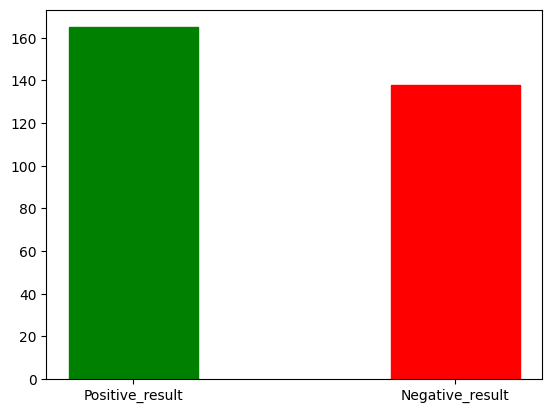

In [ ]:
# Code for plotting the positive result counts and negative result count for checking the class imbalance of the data set
X_List = ['Positive_result','Negative_result']
Total_rows = data_set['target'].count()
Positive = data_set['target'].sum()
Negative =  Total_rows - Positive
Y_List = [Positive,Negative]
Bar_graph = plt.bar(X_List,Y_List ,width = 0.4)
Bar_graph[0].set_color('green')
Bar_graph[1].set_color('red')
plt.show()

# Class Imbalance
**From the above visualization we can undersatand that the available data is perfectly balanced with almost equal number of data sets in positive result as well as negative result.**

<Axes: >

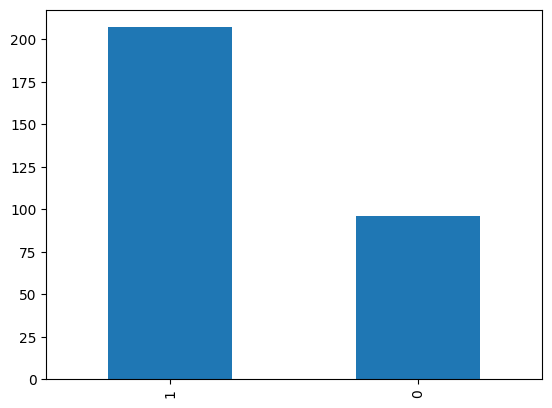

In [ ]:
data_set['sex'].value_counts().plot(kind='bar')

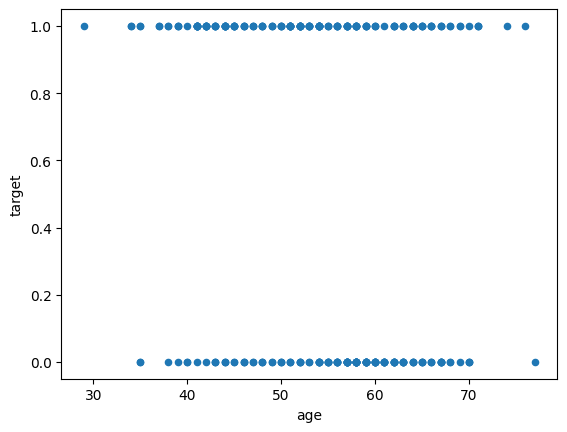

In [ ]:
data_set.plot(x="age",y="target",kind="scatter")
plt.show()

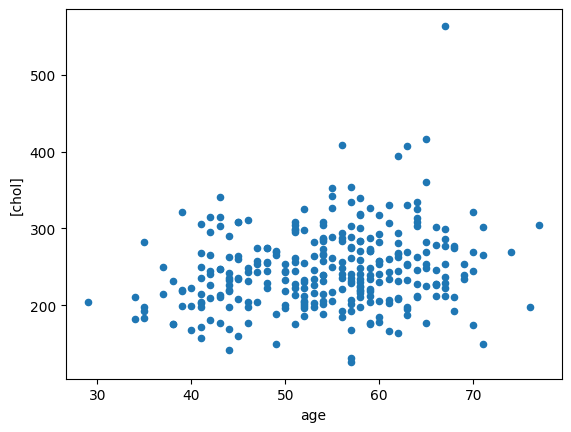

In [ ]:
data_set.plot(x="age",y=["chol"],kind="scatter")
plt.show()

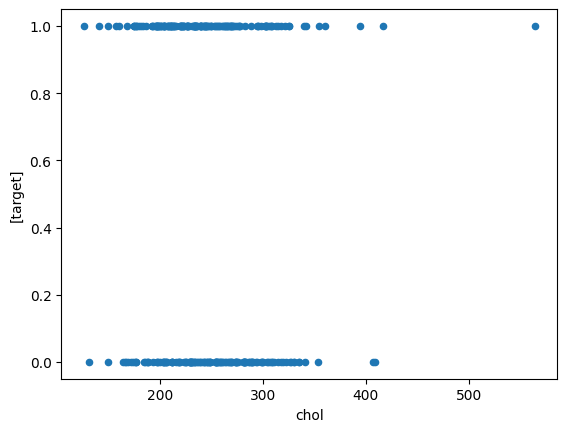

In [ ]:
data_set.plot(x="chol",y=["target"],kind="scatter")
plt.show()

In [ ]:
data_set.loc[(data_set.age>20) and (data_set.age<30) and (data_set.target==1)]


ValueError: ignored

2. Data Pre-processing and cleaning

3. Model Building

<b>Preparing Training and Test data set </b><br>

Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ; [ x_test1, y_test1] = 20% <br>
Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90% <br>

Case 1 Will be considered for building Training and Test data set.
Reason:
 *   Training data set will be used to train and develop the model. Hence it should have high amount of data
*   Also low amount of data in Training set might lead to a overfitting model
*   High amount of data in Training set will is necessary to build a more genaralized model




In [ ]:
type(data_set)

pandas.core.frame.DataFrame

In [ ]:
# Importing sklearn library to prepare training and test data sets
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Assigning columns to X and Y

# X - Predictor columns. All columns from data_set except 'target' column
X = data_set.loc[:,data_set.columns != 'target']

# Y - Target column. 'target' from data_set column
Y = data_set['target']

In [ ]:
# 20% data assigned to Test data set and remaining 80% assigned to Training data set
(X_train, X_test, Y_train, Y_test) = train_test_split(X,Y,test_size=.20)

In [ ]:
# Exploring K-fold cross validation

# Importing necessary library package
from sklearn.model_selection import KFold

# Setting K - Number of splits
kf = KFold(n_splits=5)
type(kf)

sklearn.model_selection._split.KFold

In [ ]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)

In [ ]:
# Predict values for 10 records from Test data set
logisticRegr.predict(X_test[0:10])

In [ ]:
# Calculate score by comparing the predict 'target' value Vs actual 'target' from the Test data
score = logisticRegr.score(X_test, Y_test)
print(score)